   #     pair  count  hitRate              minDate              maxDate
0  1   SPX500    973    79.96  2020-04-03 00:25:01  2023-08-28 00:25:02
1  2    UK100    737    80.05  2020-04-02 00:25:01  2023-08-25 00:25:03
2  3   NAS100    561    80.39  2020-04-02 00:25:01  2023-08-28 00:25:03
3  4  USA2000    463    80.56  2021-10-04 00:25:04  2023-08-25 00:25:03
4  5   EDOUSD     27    81.48  2020-08-12 00:25:01  2022-04-07 00:25:03


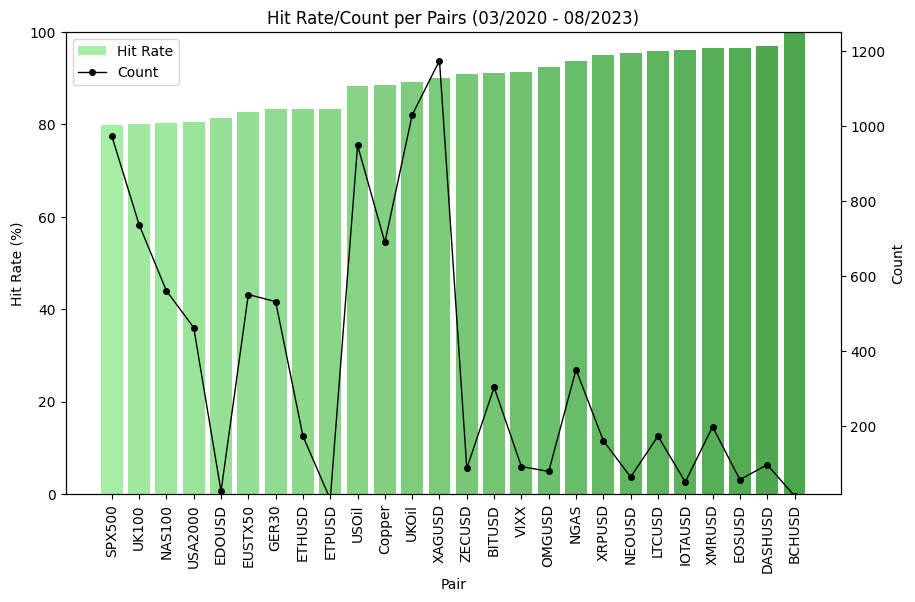

In [6]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from IPython.display import display, HTML  
import numpy as np
from matplotlib.lines import Line2D


# Read the data for pair grouping
headers = ["#","pair","count","hitRate","minDate","maxDate"]
df = pd.read_csv('pair_group.csv')
df.columns = headers
print(df.head())
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary y-axis (hit rate)
'''ax1.bar(df["pair"], df["hitRate"], color='b', alpha=0.7, label='Hit Rate')
ax1.set_xlabel('Pair')
ax1.set_ylabel('Hit Rate (%)')
ax1.set_ylim(0, 100)
'''
'''
hit_rates = df["hitRate"]
hit_rate_colors = plt.cm.Greens(np.linspace(0, 1, len(hit_rates)))  # Generate colors
ax1.bar(df.index, hit_rates, color=hit_rate_colors, alpha=0.7, label='Hit Rate')
ax1.set_xlabel('Pair')
ax1.set_ylabel('Hit Rate (%)')
ax1.set_ylim(0, 100)
'''
hit_rates = df["hitRate"]
start_color = np.array([0.5, 0.9, 0.5])  # RGB color (light green)
end_color = np.array([0, 0.5, 0])  # RGB color (dark green)
cmap = plt.cm.colors.LinearSegmentedColormap.from_list("custom_green", [start_color, end_color], N=len(hit_rates))

ax1.bar(df.index, hit_rates, color=cmap(np.arange(len(hit_rates))), alpha=0.7, label='Hit Rate')
ax1.set_xlabel('Pair')
ax1.set_ylabel('Hit Rate (%)')
ax1.set_ylim(0, 100)
# Secondary y-axis (counts)
ax2 = ax1.twinx()
ax2.plot(df["pair"], df["count"], color='black', marker='o', markersize=4, linewidth=1, label='Count')
ax2.set_ylabel('Count')
ax2.set_ylim(20, 1250)

# Rotate x-axis labels vertically
ax1.set_xticks(df.index)
ax1.set_xticklabels(df["pair"], rotation=90)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Title
plt.title('Hit Rate/Count per Pairs (03/2020 - 08/2023)')

# Show the plot
plt.show()

   #    weekday  count  hitRate              minDate              maxDate
0  1     Monday   1338    89.16  2020-03-30 00:25:01  2023-08-28 00:25:03
1  2    Tuesday   1669    88.56  2020-03-31 00:25:01  2023-08-22 00:25:03
2  3  Wednesday   1919    89.73  2020-04-01 00:25:01  2023-08-23 00:25:02
3  4   Thursday   2044    89.33  2020-04-01 00:25:01  2023-08-24 00:25:03
4  5     Friday   2144    84.84  2020-03-27 00:25:01  2023-08-25 00:25:03


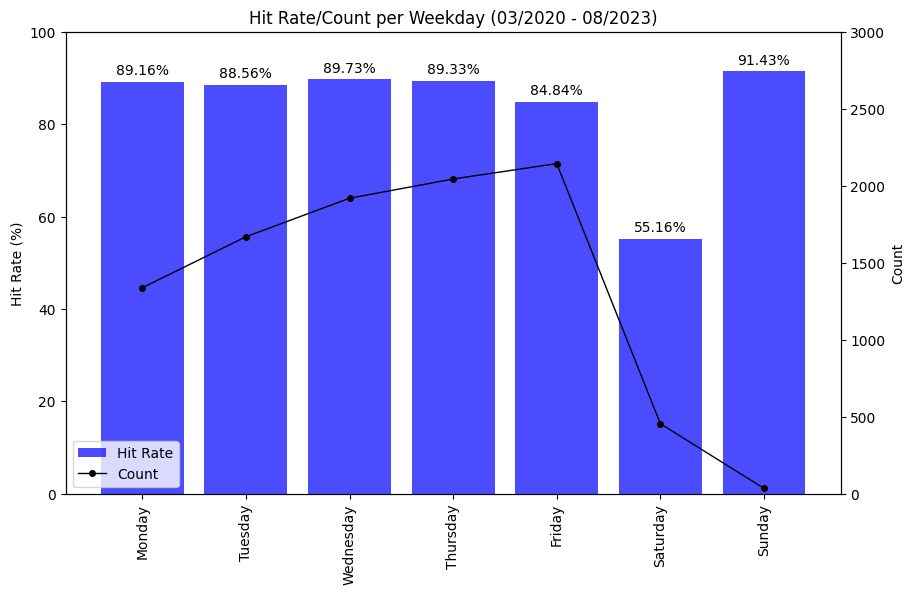

In [7]:
# Read the data for weekday grouping 
dfw = pd.read_csv('weekday_group.csv')
headers_weekday = ["#","weekday","count","hitRate","minDate","maxDate"]
dfw.columns = headers_weekday
print(dfw.head())
fig2, ax1 = plt.subplots(figsize=(10, 6))
'''
hit_rates_weekday = dfw["hitRate"]
start_color = np.array([0.5, 0.9, 0.5])  # RGB color (light green)
end_color = np.array([0, 0.5, 0])  # RGB color (dark green)
cmap = plt.cm.colors.LinearSegmentedColormap.from_list("custom_green", [start_color, end_color], N=len(hit_rates_weekday))

ax1.bar(dfw.index, hit_rates_weekday, color=cmap(np.arange(len(hit_rates_weekday))), alpha=0.7, label='Hit Rate')
ax1.set_xlabel('Weekday')
ax1.set_ylabel('Hit Rate (%)')
ax1.set_ylim(0, 100)
'''
bars = ax1.bar(dfw["weekday"], dfw["hitRate"], color='b', alpha=0.7, label='Hit Rate')
ax1.set_ylabel('Hit Rate (%)')
ax1.set_ylim(0, 100)

for bar, rate in zip(bars, dfw["hitRate"]):
    height = bar.get_height()
    ax1.annotate(f'{rate}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
    
# Secondary y-axis (counts)
ax2 = ax1.twinx()
ax2.plot(dfw["weekday"], dfw["count"], color='black', marker='o', markersize=4, linewidth=1, label='Count')
ax2.set_ylabel('Count')
ax2.set_ylim(0, 3000)

# Rotate x-axis labels vertically
ax1.set_xticks(dfw.index)
ax1.set_xticklabels(dfw["weekday"], rotation=90)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='lower left')

# Title
plt.title('Hit Rate/Count per Weekday (03/2020 - 08/2023)')

# Show the plot
plt.show()

   # server_day  count  hitRate              minDate              maxDate
0  1      c-Mon    524    88.74  2020-03-30 00:25:01  2023-08-28 00:25:02
1  2      d-Mon     87    89.66  2021-10-04 00:25:04  2023-08-21 00:25:03
2  3      s-Mon    727    89.41  2020-04-06 00:25:01  2023-08-28 00:25:03
3  4      c-Tue    673    88.41  2020-04-20 00:25:01  2023-08-22 00:25:02
4  5      d-Tue    116    86.21  2021-10-04 00:25:04  2023-08-22 00:25:03


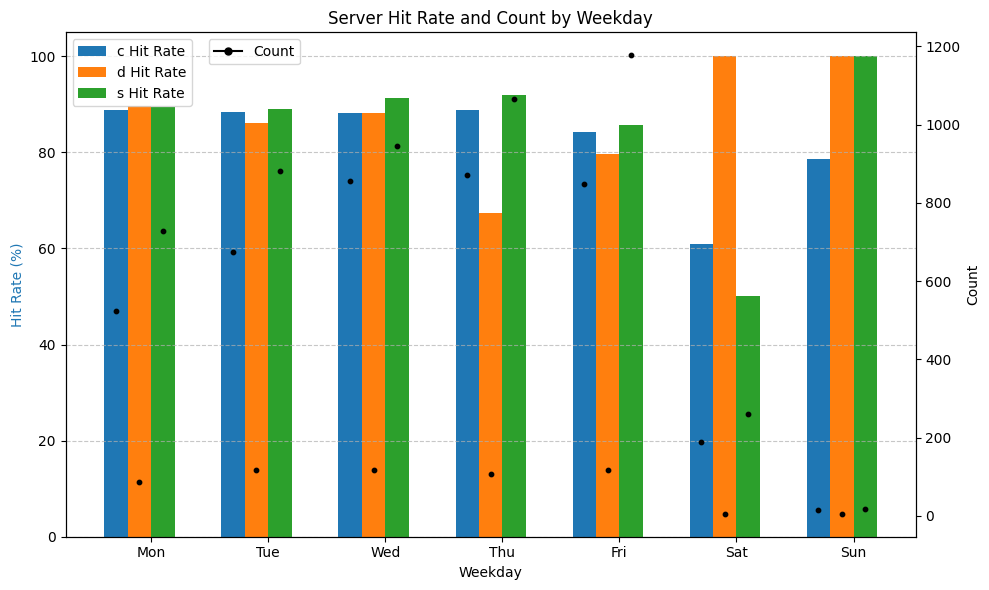

In [8]:
import matplotlib.patches as mpatches

dfsw = pd.read_csv('server_weekday_group.csv')
headers_server_weekday = ["#","server_day","count","hitRate","minDate","maxDate"]
dfsw.columns = headers_server_weekday
print(dfsw.head())


# Extract weekday and server columns from server_day
dfsw['weekday'] = dfsw['server_day'].str.split('-').str[1]
dfsw['server'] = dfsw['server_day'].str.split('-').str[0]

# Define the desired order of weekdays
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Create a pivot table to reshape the data for plotting
pivot_df = dfsw.pivot(index='weekday', columns='server', values='hitRate')

# Create a secondary DataFrame for count
count_df = dfsw.pivot(index='weekday', columns='server', values='count')

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the hitRate using ax1
width = 0.2
x = np.arange(len(weekday_order))  # Use the custom order
for i, server in enumerate(pivot_df.columns):
    ax1.bar(x + i * width, pivot_df[server][weekday_order], width=width, label=f'{server} Hit Rate')

# Set labels and title for ax1
ax1.set_xlabel('Weekday')
ax1.set_ylabel('Hit Rate (%)', color='tab:blue')
ax1.set_xticks(x + width * len(pivot_df.columns) / 2)
ax1.set_xticklabels(weekday_order)  # Use the custom order
ax1.legend(loc='upper left')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a secondary y-axis (ax2) for count with smaller markers
ax2 = ax1.twinx()
for i, server in enumerate(count_df.columns):
    count_values = count_df[server][weekday_order].tolist()
    ax2.scatter(x + i * width, count_values, marker='o', color='black', s=10)

# Set labels and title for ax2
ax2.set_ylabel('Count', color='black')

# Create a custom legend for "Count" only once
legend_elements = [Line2D([0], [0], marker='o', color='black', markersize=5, label='Count')]
ax2.legend(handles=legend_elements, loc='upper left',bbox_to_anchor=(0.16, 1.0))

# Finalize and display the plot
plt.title('Server Hit Rate and Count by Weekday')
plt.tight_layout()
plt.show()

   #  pctmove  count  hitRate              minDate              maxDate
0  1    0.000    940    97.13  2020-03-27 00:25:01  2023-08-25 00:25:03
1  2    0.001   2127    93.42  2020-04-01 00:25:01  2023-08-28 00:25:03
2  3    0.002   2019    88.41  2020-03-27 00:25:01  2023-08-28 00:25:03
3  4    0.003   1889    84.44  2020-03-27 00:25:01  2023-08-28 00:25:02
4  5    0.004   1797    79.08  2020-04-01 00:25:01  2023-08-25 00:25:03


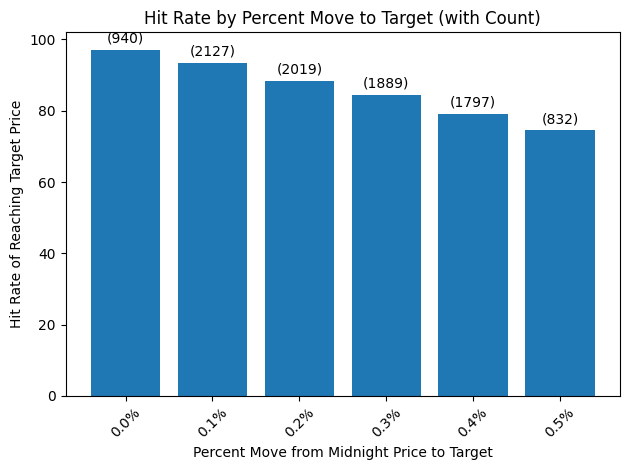

In [9]:
dfpm = pd.read_csv('pctmove_group.csv')
headers_pctmove = ["#","pctmove","count","hitRate","minDate","maxDate"]
dfpm.columns = headers_pctmove
print(dfpm.head())

# Assuming you have already loaded your data into dfpm
unique_pctmove = dfpm["pctmove"].unique()

# Convert the x-axis values to percentages
x_labels = [f'{pct * 100:.1f}%' for pct in unique_pctmove]

# Create the bar graph with categorical x-axis labels
fig, ax = plt.subplots()
bars = ax.bar(range(len(unique_pctmove)), dfpm.groupby("pctmove")["hitRate"].mean(), tick_label=x_labels)

# Add count labels on top of each bar
for bar, count in zip(bars, dfpm.groupby("pctmove")["count"].sum()):
    height = bar.get_height()
    ax.annotate(f'({count})', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Set labels and title
ax.set_xlabel("Percent Move from Midnight Price to Target")
ax.set_ylabel("Hit Rate of Reaching Target Price")
ax.set_title("Hit Rate by Percent Move to Target (with Count)")

# Rotate x-axis labels if they are too long
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
